In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy import integrate
from scipy.integrate import simps

In [39]:
df1 = pd.read_csv("prices_round_2_day_-1.csv", sep = ";")
df1

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1
...,...,...,...,...,...,...,...,...
9996,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1
9997,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1
9998,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1
9999,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424,-1


In [55]:
df1["SUNLIGHT_EXPOSURE_PER_BLOCK"] = df1["SUNLIGHT"] * 0.0012
total_sunlight_exposure_for_day = df1["SUNLIGHT_EXPOSURE_PER_BLOCK"].sum()
a = total_sunlight_exposure_for_day/2500

derr_s = df1["SUNLIGHT"].diff() / 0.0012
df1["diffs"] = derr_s

sunlight_data = df1.get("SUNLIGHT")
trp_int = integrate.trapezoid(df1.get("SUNLIGHT"),dx=0.0012)
s = simps(df1.get("SUNLIGHT"), dx = 0.0012)
print(s/2500)
print(trp_int/2500)
print(a)
#trp_int= trapz(sunlight_data, dx=0.0012)
#trp_int
df_derr = df1[df1.get("diffs") >= 0]
df_derr
df_humid = df1[(df1.get("HUMIDITY") >= 60) & (df1.get("HUMIDITY") <= 80)]
df_humid

17.375001967712
17.37500197464
17.376537974639998


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,SUNLIGHT_EXPOSURE_PER_BLOCK,diffs
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1,3.000000,NaN
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1,2.999304,-483.583333
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1,2.998615,-478.333333
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1,2.997934,-473.083333
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1,2.997260,-467.833333
...,...,...,...,...,...,...,...,...,...,...
7496,749600,1193.50,1.3,11.5,-2.6,3295.3782,79.959440,-1,3.954454,962.916667
7497,749700,1193.75,1.3,11.5,-2.6,3296.5337,79.969620,-1,3.955840,962.916667
7498,749800,1194.75,1.3,11.5,-2.6,3297.6892,79.979774,-1,3.957227,962.916667
7499,749900,1194.25,1.3,11.5,-2.4,3298.8447,79.989900,-1,3.958614,962.916667


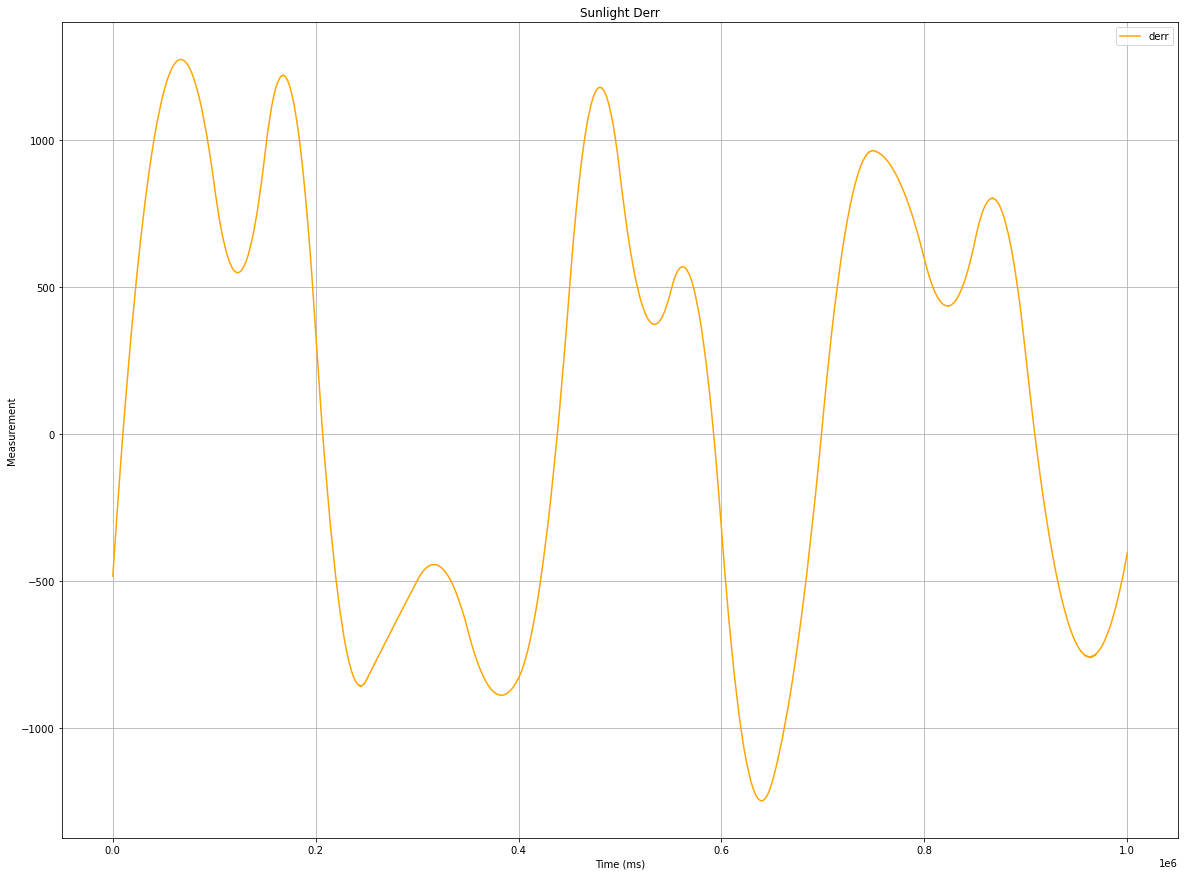

In [45]:
plt.figure(figsize=(20, 15))
plt.plot(df1["timestamp"][1:].to_numpy(), df1["diffs"][1:].to_numpy(), label="derr", color="orange")
plt.xlabel("Time (ms)")
plt.ylabel("Measurement")
plt.title("Sunlight Derr")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def calculate_total_sunlight(sunlight_column):
    total_sunlight = 0
    interval_count = 833 
    for i in range(0, len(sunlight_column), interval_count):
        if i + interval_count <= len(sunlight_column):
            current_block = sunlight_column[i:i + interval_count]
        else:
            current_block = sunlight_column[i:]
        average_rate = np.mean(current_block)
        total_sunlight += average_rate
    return total_sunlight

snlt = calculate_total_sunlight(df1["SUNLIGHT"])
snlt/2500

18.934514974626655

In [38]:
df2 = pd.read_csv("prices_round_2_day_0.csv", sep = ";")
df2

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000,0
1,100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990,0
2,200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980,0
3,300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970,0
4,400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950,0
...,...,...,...,...,...,...,...,...
9996,999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100,0
9997,999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806,0
9998,999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530,0
9999,999900,986.75,1.3,10.5,-2.6,1700.8980,64.997260,0


In [31]:
df2["SUNLIGHT_EXPOSURE_PER_BLOCK"] = df2["SUNLIGHT"] * 0.0012

# total sun exposure
total_sunlight_exposure_for_day = df2["SUNLIGHT_EXPOSURE_PER_BLOCK"].sum()

b = total_sunlight_exposure_for_day/2500
b
trp_int = integrate.trapezoid(df2.get("SUNLIGHT"),dx=0.0012)
trp_int/2500

10.941366270479998

In [37]:
df3 = pd.read_csv("prices_round_2_day_1.csv", sep = ";")
df3

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...,...
9996,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1
9997,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1
9998,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1
9999,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,1


In [33]:
df3["SUNLIGHT_EXPOSURE_PER_BLOCK"] = df3["SUNLIGHT"] * 0.0012

total_sunlight_exposure_for_day = df3["SUNLIGHT_EXPOSURE_PER_BLOCK"].sum()

c = total_sunlight_exposure_for_day/2500
c
trp_int = integrate.trapezoid(df3.get("SUNLIGHT"),dx=0.0012)
trp_int/2500

11.673405958223997

In [40]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df
df['timestamp_c'] = np.arange(0, 3000300, 100)
df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,timestamp_c
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1,0
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,100
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,200
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,300
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,400
...,...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1,2999800
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1,2999900
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1,3000000
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1,3000100


In [41]:
df.groupby("DAY").mean()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,timestamp_c
DAY,,,,,,,,
-1,500000.0,1208.804745,1.400110,10.071043,-2.590221,3619.750103,85.621408,500000.0
0,500000.0,1041.251175,1.384912,9.961154,-2.570763,2279.533353,74.036523,1500100.0
1,500000.0,1060.797645,0.926107,9.151935,-5.054445,2431.936381,77.562755,2500200.0


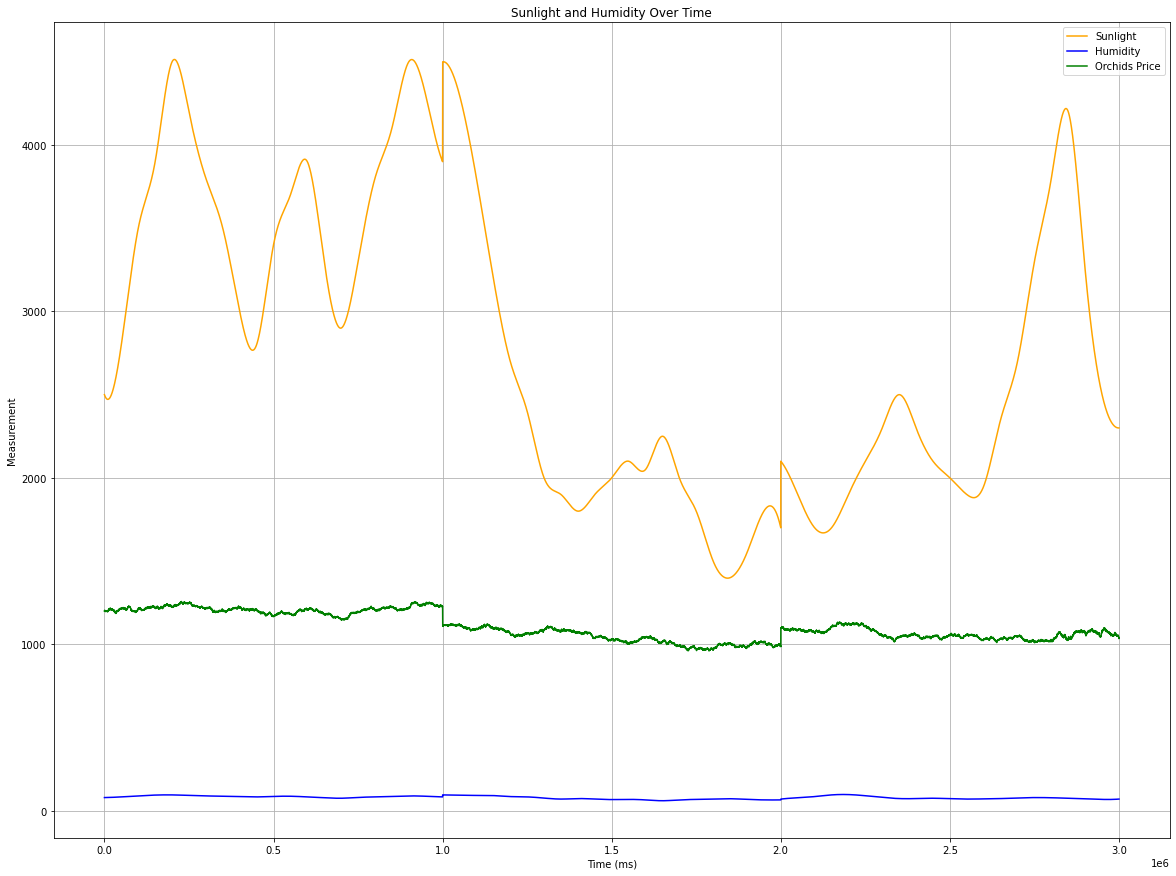

In [23]:
plt.figure(figsize=(20, 15))
plt.plot(df["timestamp_c"].to_numpy(), df["SUNLIGHT"].to_numpy(), label="Sunlight", color="orange")
plt.plot(df["timestamp_c"].to_numpy(), df["HUMIDITY"].to_numpy(), label="Humidity", color="blue")
plt.plot(df["timestamp_c"].to_numpy(), df["ORCHIDS"].to_numpy(), label="Orchids Price", color="green")
plt.xlabel("Time (ms)")
plt.ylabel("Measurement")
plt.title("Sunlight and Humidity Over Time")
plt.legend()
plt.grid(True)
plt.show()

\int_{0}^{833.33} sunlight/iter diter